In [3]:
# Installing the dependencies and loading the dataset
import pandas as pd
messages=pd.read_csv("SMSSpamCollection.txt", sep="\t", names=["Label", "Message"])

In [4]:
import numpy as np
import seaborn as sns

In [5]:
# Now that we have the datset loaded let's get our handy dirty with the data
messages.head(4)

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


Text(0.5, 1.0, 'Number of ham and spam messages')

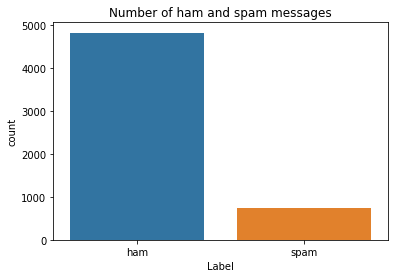

In [9]:
# I would like to know the number of hamd and spamm messages so let's use seaborn for it
import matplotlib.pyplot as plt
sns.countplot(messages.Label)
plt.xlabel("Label")
plt.title("Number of ham and spam messages")

In [10]:
# We see there is clearly a huge imbalance in the dataset I think we can fix it but now today
# let's decouple the dataset
y=messages.Label
x=messages.Message
# applying encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(y)



In [11]:
print(Y)

[0 0 1 ... 0 0 0]


In [12]:
y=Y.reshape(-11)

In [14]:
print(y)

[0 0 1 ... 0 0 0]


In [15]:
# Lets' perform train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.15)

# A library for Tokenization

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [22]:
# A good first step to perform when working with text data is to split it into words. Words are caled tokens and the process
# of splitting teh text to words or sentences is called tokenization.
#Keras provides you text_to_word_sequence() that you can use text to slit into words
max_words=1000
max_len=150
TN=Tokenizer(num_words=max_words)
TN.fit_on_texts(x_train)
sequences=TN.texts_to_sequences(x_train)

In [23]:
print(sequences)

[[29, 3, 146, 14, 227, 26, 28, 3, 70, 2, 36, 198, 533, 147], [36, 64, 114], [65, 5, 15, 6, 44, 30, 798], [179, 12, 628, 10, 23, 3, 914], [97, 9, 199, 1, 434, 799, 32, 199, 328, 37, 6, 56, 422, 32, 10, 71, 2, 262, 77, 352, 320, 229], [11, 1, 70, 3, 2, 104, 20, 26, 164, 15, 510, 89, 9, 743, 18, 13, 110, 743], [53, 2, 108, 39, 74, 607, 46, 236, 39, 78, 2, 153, 106, 1, 31, 50, 37, 95, 61, 26, 25], [26, 26, 26], [122, 22, 3, 115], [122, 6, 105], [126, 1, 17, 2, 482, 21, 23], [179, 12, 40, 116, 3, 136, 4, 55, 63, 89], [359, 75, 665, 3, 44, 45, 1, 33, 120, 151], [36, 308, 11, 400, 53, 1, 57, 44, 2], [800, 155, 534, 3, 2, 11, 71, 35, 401, 7, 309, 360, 2, 372, 48, 6, 801, 231, 131, 100, 82, 2, 310], [29, 3, 71, 26, 22, 3, 132, 629, 666], [22, 3, 90, 270, 5], [55, 435, 436, 11, 706, 423, 69, 992, 10, 286, 2, 452, 10, 1, 165, 3, 158, 373], [155], [339, 16, 10, 45, 3, 33, 5, 374, 4, 279, 15, 744, 453, 10, 2, 153, 3, 84, 4, 340, 535], [1, 59, 9, 16, 3, 93], [40, 8, 3, 4, 126, 63, 237, 10, 84, 13, 3

In [32]:
sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_len) # Add padding to ensure that all the sequences have the same shape.


In [33]:
print(sequences_matrix)

[[  0   0   0 ... 198 533 147]
 [  0   0   0 ...  36  64 114]
 [  0   0   0 ...  44  30 798]
 ...
 [  0   0   0 ... 502 132 324]
 [  0   0   0 ...  16 133 433]
 [  0   0   0 ...  11   8 160]]


In [34]:
# Keras embedding layer: It offers an embedding layer that can be used for neural networks in text data.
#It requires the input data be integer encoded, so each word is reperesented by a unique integer, It can be used to load a 
# pre ttrained word embededing model, a type of transferlearning
from keras.models import Model
from keras.layers import Activation, Dense, Embedding, Input, Dropout, LSTM
from keras.optimizers import RMSprop
%matplotlib inline
def RNN():
    inputs=Input(name="Inputs", shape=[max_len])
    layer=Embedding(input_dim=max_words, output_dim=50, input_length=max_len)(inputs)
    layer=LSTM(64)(layer)
    layer=Dense(256, name="FC1" )(layer)
    layer=Activation("relu")(layer)
    layer=Dropout(0.5)(layer)
    layer=Dense(1, name="output_layer")(layer)
    layer=Activation("sigmoid")(layer)
    model=Model(inputs=inputs, outputs=layer)
    return model


In [30]:
# Lets find the summary and complie teh model
model=RNN()
model.summary()
model.compile(loss="binary_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 257 

In [31]:
# Fit on the training data.

In [37]:
# A call back isa set of functions to be applied at given stages of the trainnig procedure.
#you can use calls back to get a view on internal states and statistics of the model during training.
#You can pass the list of callbacks(as a keyword agrument callbacks) to teh fit() method of the sequential or model classes.
#The relevant methods of the call backs will then be called at each stage of the training.
from keras.callbacks import EarlyStopping
model.fit(sequences_matrix, y_train, batch_size=128, epochs=100,validation_split=0.2, callbacks=[EarlyStopping(monitor="val_loss, min_delta=0.0001")])

E:\New folder\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3788 samples, validate on 948 samples
Epoch 1/100
3788/3788 [==============================] - 28s 7ms/step - loss: 0.3318 - accuracy: 0.8722 - val_loss: 0.1497 - val_accuracy: 0.9673
Epoch 2/100


E:\New folder\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss, min_delta=0.0001` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


3788/3788 [==============================] - 18s 5ms/step - loss: 0.0833 - accuracy: 0.9776 - val_loss: 0.0625 - val_accuracy: 0.9810
Epoch 3/100
3788/3788 [==============================] - 21s 6ms/step - loss: 0.0406 - accuracy: 0.9881 - val_loss: 0.0523 - val_accuracy: 0.9852
Epoch 4/100
3788/3788 [==============================] - 17s 5ms/step - loss: 0.0288 - accuracy: 0.9918 - val_loss: 0.0521 - val_accuracy: 0.9852
Epoch 5/100
3788/3788 [==============================] - 20s 5ms/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.0629 - val_accuracy: 0.9821
Epoch 6/100
3788/3788 [==============================] - 32s 8ms/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0710 - val_accuracy: 0.9821
Epoch 7/100
3788/3788 [==============================] - 21s 6ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.0820 - val_accuracy: 0.9810
Epoch 8/100
3788/3788 [==============================] - 19s 5ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.1075 - val_accurac

Epoch 57/100
3788/3788 [==============================] - 19s 5ms/step - loss: 2.6502e-08 - accuracy: 1.0000 - val_loss: 0.5707 - val_accuracy: 0.9747
Epoch 58/100
3788/3788 [==============================] - 17s 4ms/step - loss: 2.3902e-08 - accuracy: 1.0000 - val_loss: 0.5738 - val_accuracy: 0.9747
Epoch 59/100
3788/3788 [==============================] - 18s 5ms/step - loss: 1.1934e-08 - accuracy: 1.0000 - val_loss: 0.5769 - val_accuracy: 0.9757
Epoch 60/100
3788/3788 [==============================] - 17s 4ms/step - loss: 2.6402e-08 - accuracy: 1.0000 - val_loss: 0.5670 - val_accuracy: 0.9747
Epoch 61/100
3788/3788 [==============================] - 17s 4ms/step - loss: 4.4357e-08 - accuracy: 1.0000 - val_loss: 0.6136 - val_accuracy: 0.9726
Epoch 62/100
3788/3788 [==============================] - 17s 4ms/step - loss: 6.2849e-09 - accuracy: 1.0000 - val_loss: 0.6218 - val_accuracy: 0.9726
Epoch 63/100
3788/3788 [==============================] - 16s 4ms/step - loss: 1.6470e-09 - ac

In [39]:
# let's process the testdata
test_sequences=TN.texts_to_sequences(x_test)
test_sequences_matrix=sequence.pad_sequences(test_sequences, maxlen=max_len)

In [40]:
# evaluate the model on the test data
accuracy=model.evaluate(test_sequences_matrix, y_test)

836/836 [==============================] - 3s 4ms/step


In [41]:
print("Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}".format(accuracy[0], accuracy[1]))

Test set
 Loss: 0.669
 Accuracy: 0.975


In [58]:
testing_context=["Free entry for everyone"]
test=TN.texts_to_sequences(testing_context)
test_matrix=sequence.pad_sequences(test, maxlen=max_len)

In [59]:
# prediction
pred=model.predict(test_matrix)
print(pred)

[[1.]]
